In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from pathlib import Path
import numpy as np

---
# Download Data

In [13]:
folder = 'coffee'
file = 'urls_coffee.csv'

In [8]:
folder = 'pizza'
file = 'urls_pizza.csv'

In [14]:
path = Path('data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[PosixPath('data/models'),
 PosixPath('data/coffee'),
 PosixPath('data/urls_coffee.csv'),
 PosixPath('data/pizza'),
 PosixPath('data/urls_pizza.csv')]

In [2]:
classes = ['pizza', 'coffee']

In [39]:
download_images(path/file, dest, max_pics=200)

Error https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTMUPsWG8oBZvvobBQzGJQrq_Gff1IfZDTpH_cHpvT5v0JkBvB3&usqp=CAU HTTPSConnectionPool(host='encrypted-tbn0.gstatic.com', port=443): Max retries exceeded with url: /images?q=tbn%3AANd9GcTMUPsWG8oBZvvobBQzGJQrq_Gff1IfZDTpH_cHpvT5v0JkBvB3&usqp=CAU (Caused by ProxyError('Cannot connect to proxy.', timeout('timed out',)))


---
Varifies images and deletes the unhealthy ones (like currupted, webp, without extension, etc)

In [55]:
for c in classes:
    print(c)
    verify_images(path/c)

pizza


coffee


---
# View Data

In [15]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=0).normalize(imagenet_stats)

In [ ]:
data.classes

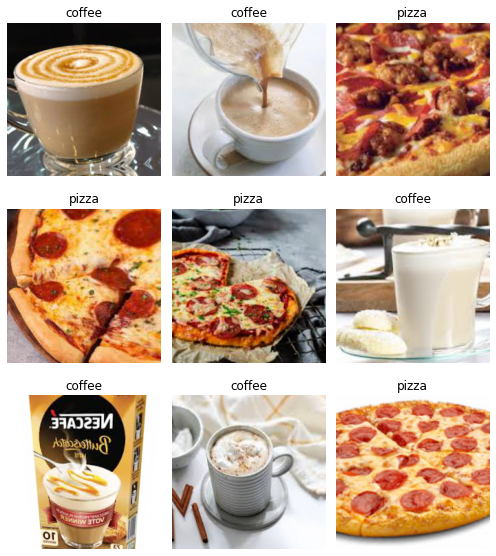

In [94]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['coffee', 'pizza'], 2, 320, 80)

---
# Train Model

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.462052,0.000496,0.000000,06:38


In [10]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.075231,0.000112,0.000000,01:34


In [15]:
learn.save('stage-1')

In [18]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (320 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
coffee,coffee,coffee,coffee,coffee
Path: data;

Valid: LabelList (80 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pizza,coffee,coffee,coffee,pizza
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [19]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time
